In [44]:
import json

# Load Q-values from the JSON file
path = "/home/bubble/tenggy/FRA503-Deep-Reinforcement-Learning-for-Robotics/CartPole_4.5.0/q_value/Stabilize/SARSA/SARSA_rerun/SARSA_4900_7_10_5_11.json"


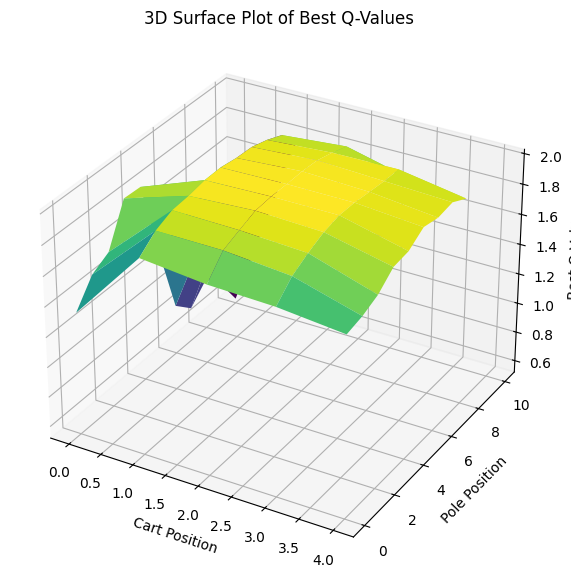

In [45]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Q-values from the file
# file_path = "./q_value/Stabilize/Q_Learning/Finalbase/Q_Learning_4900_11_12.0_5_11.json"  # Update this with your actual file path
with open(path, "r") as f:
    data = json.load(f)

q_values = data["q_values"]

# Extract the best Q-value for each (cart position, pole position) pair
q_table = {}
for key, values in q_values.items():
    cart_pos, pole_pos, _, _ = eval(key)  # Extract cart position and pole position
    best_q_value = max(values)  # Get the best Q-value for the state
    if (cart_pos, pole_pos) not in q_table:
        q_table[(cart_pos, pole_pos)] = best_q_value
    else:
        q_table[(cart_pos, pole_pos)] = max(q_table[(cart_pos, pole_pos)], best_q_value)

# Prepare data for plotting
cart_positions = sorted(set(k[0] for k in q_table.keys()))
pole_positions = sorted(set(k[1] for k in q_table.keys()))

X, Y = np.meshgrid(cart_positions, pole_positions, indexing='ij')
Z = np.array([[q_table.get((x, y), np.nan) for y in pole_positions] for x in cart_positions])

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("Cart Position")
ax.set_ylabel("Pole Position")
ax.set_zlabel("Best Q-Value")
ax.set_title("3D Surface Plot of Best Q-Values")

plt.show()

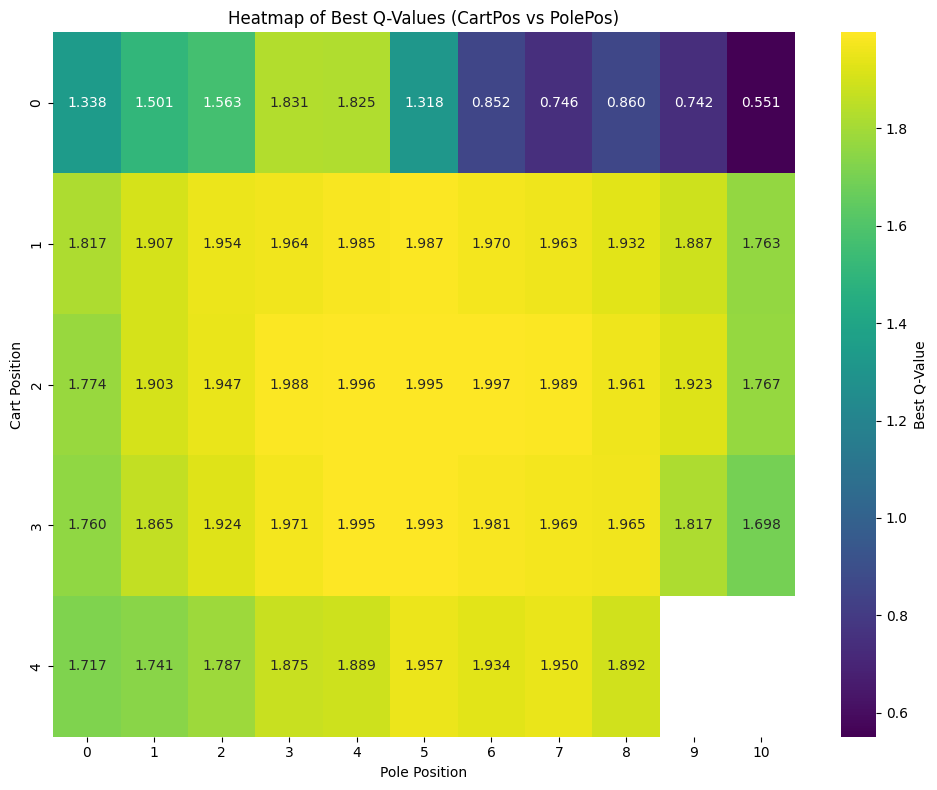

In [46]:
import json
import numpy as np
import seaborn as sns

q_values = data["q_values"]

# Extract best Q-values for (cart_pos, pole_pos)
q_table = {}
for key, values in q_values.items():
    cart_pos, pole_pos, _, _ = eval(key)
    best_q = max(values)
    if (cart_pos, pole_pos) not in q_table:
        q_table[(cart_pos, pole_pos)] = best_q
    else:
        q_table[(cart_pos, pole_pos)] = max(q_table[(cart_pos, pole_pos)], best_q)

# Prepare matrix for heatmap
cart_positions = sorted(set(k[0] for k in q_table.keys()))
pole_positions = sorted(set(k[1] for k in q_table.keys()))

heatmap_data = np.full((len(cart_positions), len(pole_positions)), np.nan)
for i, cart in enumerate(cart_positions):
    for j, pole in enumerate(pole_positions):
        heatmap_data[i, j] = q_table.get((cart, pole), np.nan)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    xticklabels=pole_positions,
    yticklabels=cart_positions,
    cmap="viridis",
    annot=True,
    fmt=".3f",
    cbar_kws={'label': 'Best Q-Value'}
)
plt.title("Heatmap of Best Q-Values (CartPos vs PolePos)")
plt.xlabel("Pole Position")
plt.ylabel("Cart Position")
plt.tight_layout()
plt.show()
